Students:

Ali (ali_242361) -  George (george_237618)
*F22- MWS - WDA Assignment*
----


# Loading data from Kaggle
(Requires an API key to access Kaggle Data, example key is provided in the zip file)


In [3]:
# install  required library 
! pip install -q kaggle
! mkdir ~/.kaggle

# The kaggle.json file contains API creds, you need to provide your own key to be able to download the  dataset.
# please refer to the attached readme for more info
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# download & unzip data from kaggle after setup is complete
! kaggle datasets download --force kyanyoga/sample-sales-data
! unzip /content/sample-sales-data.zip

  0% 0.00/77.5k [00:00<?, ?B/s]
100% 77.5k/77.5k [00:00<00:00, 17.6MB/s]
Archive:  /content/sample-sales-data.zip
  inflating: sales_data_sample.csv   


# Reading data into Pandas dataframes

In [5]:
import pandas as pd
import numpy as np

#loading data into a pandas dataframe with proper encoding standard
sales = pd.read_csv('/content/sales_data_sample.csv',encoding='ISO-8859-1')


In [6]:
# getting a copy so we don't perform ops on original dataset
df = sales.copy()

#choosing columns based on assignment Dataset text
columns = ['ORDERNUMBER','PRODUCTLINE','QUANTITYORDERED','PRICEEACH','ORDERDATE','MONTH_ID','ADDRESSLINE1','CITY','YEAR_ID']
df=df[columns]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   PRODUCTLINE      2823 non-null   object 
 2   QUANTITYORDERED  2823 non-null   int64  
 3   PRICEEACH        2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   MONTH_ID         2823 non-null   int64  
 6   ADDRESSLINE1     2823 non-null   object 
 7   CITY             2823 non-null   object 
 8   YEAR_ID          2823 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 198.6+ KB


#Data Preprocessing

we will be working on data for the last year only as dictated by assignment introduction pragaraph (it says last year not years).

note that not much data preprocessing steps are necessary as the dataset seems to be OK (no emmpty cells in selected columns!)

##Removing data that is not from the last year

In [18]:
#We first get the last year value and the filter out irrelevant rows

#last year is the max value of the YEAR_ID COLUMN
last_year = df['YEAR_ID'].max()

#removing entries  that are not from the last year
df = df[df['YEAR_ID'] == last_year]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 22 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      478 non-null    int64  
 1   PRODUCTLINE      478 non-null    object 
 2   QUANTITYORDERED  478 non-null    int64  
 3   PRICEEACH        478 non-null    float64
 4   ORDERDATE        478 non-null    object 
 5   MONTH_ID         478 non-null    int64  
 6   ADDRESSLINE1     478 non-null    object 
 7   CITY             478 non-null    object 
 8   YEAR_ID          478 non-null    int64  
 9   OrderRevenue     478 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 41.1+ KB


##Filling Missing  Values

In [19]:
#Filling Missing Numerical Values (using means)
numerical_columns =['ORDERNUMBER','QUANTITYORDERED','PRICEEACH']
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace = True)
    # df[column]= df[column].round().astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 22 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      478 non-null    int64  
 1   PRODUCTLINE      478 non-null    object 
 2   QUANTITYORDERED  478 non-null    int64  
 3   PRICEEACH        478 non-null    float64
 4   ORDERDATE        478 non-null    object 
 5   MONTH_ID         478 non-null    int64  
 6   ADDRESSLINE1     478 non-null    object 
 7   CITY             478 non-null    object 
 8   YEAR_ID          478 non-null    int64  
 9   OrderRevenue     478 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 41.1+ KB


In [20]:
# Filling missing categorical values (usng frequencies)
categorical_columns = ['PRODUCTLINE','ORDERDATE','ADDRESSLINE1','CITY']

most_frequent_item = {}
for column in categorical_columns:
    most_frequent_item[column] = df[column].mode()[0]

for column in categorical_columns:
   df[column].fillna( most_frequent_item[column], inplace = True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 22 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      478 non-null    int64  
 1   PRODUCTLINE      478 non-null    object 
 2   QUANTITYORDERED  478 non-null    int64  
 3   PRICEEACH        478 non-null    float64
 4   ORDERDATE        478 non-null    object 
 5   MONTH_ID         478 non-null    int64  
 6   ADDRESSLINE1     478 non-null    object 
 7   CITY             478 non-null    object 
 8   YEAR_ID          478 non-null    int64  
 9   OrderRevenue     478 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 41.1+ KB


,ORDERNUMBER,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,ORDERDATE,MONTH_ID,ADDRESSLINE1,CITY,YEAR_ID,OrderRevenue
22,10375,Motorcycles,21,34.91,2/3/2005 0:00,2,"67, rue des Cinquante Otages",Nantes,2005,733.11
23,10388,Motorcycles,42,76.36,3/3/2005 0:00,3,1785 First Street,New Bedford,2005,3207.12
24,10403,Motorcycles,24,100.00,4/8/2005 0:00,4,Berkeley Gardens 12 Brewery,Liverpool,2005,2400.00
25,10417,Motorcycles,66,100.00,5/13/2005 0:00,5,"C/ Moralzarzal, 86",Madrid,2005,6600.00
49,10369,Classic Cars,41,100.00,1/20/2005 0:00,1,7825 Douglas Av.,Brickhaven,2005,4100.00


*Note that we did not encode "PRODUCTLINE" as it doesn't affect our analysis. we only use this column for categorizing and encoding it would not add any valuable performance boost.*

#Computing Metric for Each Product

##Total Revenue Generated per Product

In [21]:
# Total Revenue = QUANTITYORDERED * PRICEEACH
# Create a new column called "revenue" that multiplies "QUANTITYORDERED" and "PRICEEACH"
df['OrderRevenue'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Group your data by PRODUCTLINE and calculate the total revenue for each group
revenue_per_product_line = df.groupby('PRODUCTLINE')['OrderRevenue'].sum()

# Round revenue to 2 decimal places
revenue_per_product_line = revenue_per_product_line.round().astype(int)

print(revenue_per_product_line)


PRODUCTLINE
Classic Cars        527652
Motorcycles         192486
Planes              175849
Ships               119195
Trains               30691
Trucks and Buses    146772
Vintage Cars        286391
Name: OrderRevenue, dtype: int64


##Total Units Sold per Product

In [22]:
# Total Units sold is the total sum of QUANTITYORDERED column grouped by the product

total_units_sold_per_product_line = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum()
print(total_units_sold_per_product_line)

PRODUCTLINE
Classic Cars        6101
Motorcycles         2234
Planes              2207
Ships               1346
Trains               409
Trucks and Buses    1719
Vintage Cars        3615
Name: QUANTITYORDERED, dtype: int64


##Average Price per Product Unit

In [23]:
# Average price = TOTALREVENUE / QUANTITYORDERED 
average_price_per_product_line = ( revenue_per_product_line / total_units_sold_per_product_line
).round().astype(int)

print(average_price_per_product_line )

PRODUCTLINE
Classic Cars        86
Motorcycles         86
Planes              80
Ships               89
Trains              75
Trucks and Buses    85
Vintage Cars        79
dtype: int64


##Total Number of Orders per Product

In [24]:
#total number of orders = count of rows as each row is exactly one order

total_number_of_orders_per_product_line = total_units_sold = df.groupby('PRODUCTLINE')['PRODUCTLINE'].count()

print(total_number_of_orders_per_product_line)

PRODUCTLINE
Classic Cars        159
Motorcycles          58
Planes               60
Ships                38
Trains               12
Trucks and Buses     49
Vintage Cars        102
Name: PRODUCTLINE, dtype: int64


##Ranking Products Based on Metrics

In [25]:
# rank products based on each metric

rank_total_revenue = revenue_per_product_line.rank().round().astype(int)
rank_total_units_sold = total_units_sold.rank().round().astype(int)
rank_average_price = average_price_per_product_line.rank().round().astype(int)
rank_total_No_orders = total_number_of_orders_per_product_line.rank().round().astype(int)

# create a dictionary with  rank data
rank_data = {'revenue': rank_total_revenue,
             'units sold': rank_total_units_sold,
             'price (avg)': rank_average_price,
             'Numbr of orders': rank_total_No_orders}

# create a new DataFrame with your rank data
rank_df = pd.DataFrame(rank_data)

print(rank_df)

                  revenue  units sold  price (avg)  Numbr of orders
PRODUCTLINE                                                        
Classic Cars            7           7            6                7
Motorcycles             5           4            6                4
Planes                  4           5            3                5
Ships                   2           2            7                2
Trains                  1           1            1                1
Trucks and Buses        3           3            4                3
Vintage Cars            6           6            2                6


##Generating Ranking Visualization and results

<Axes: xlabel='PRODUCTLINE'>

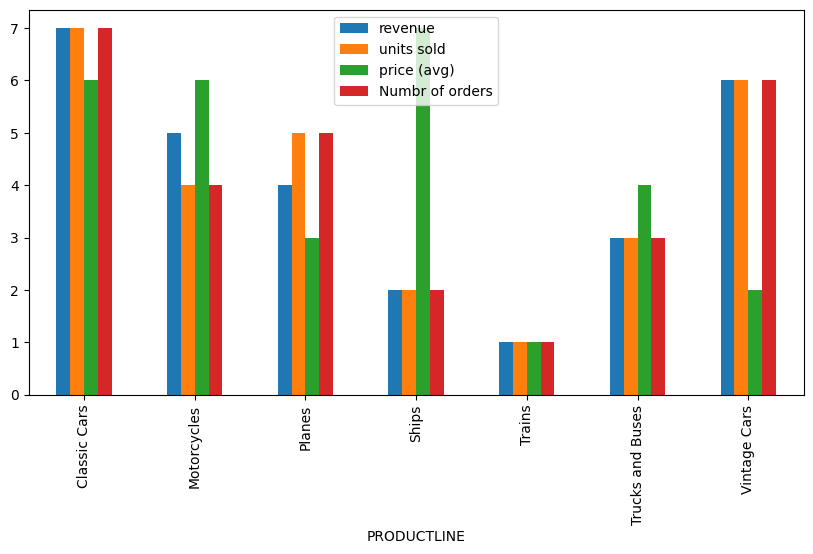

In [26]:
#Generating visualzation
rank_df.plot(kind='bar', figsize=(10, 5))
# plt.xticks(rotation=0)
# plt.xlabel('Product Line')
# plt.ylabel('Rank')
# plt.show()

##1   Classing Cars
To maintain or boost performance for Classic Cars, the company could consider expanding its product line to include limited edition releases. Additionally, the company could explore partnerships or collaborations with other brands to increase visibility and reach new customers.

##2  Motorcycles
To maintain or boost performance for Motorcycles, the company could consider offering customization options or accessories to allow customers to personalize their purchases. Additionally, the company could explore targeted marketing campaigns to reach new customer segments.
Also, the company should offer discounts occasional or decrease the price if possible.

##3 Planes
Thanks to the high number of orders, We believe that the company should consider a price increase for planes category as this will generate more revenue. Noticing that the order pool is big enough, the company might consider sponsored products or collaborations with international airlines and official governmental agencies.

##4 Ships
With relatively low revenue and total sales while having prices in the upper tiers, We recommend a total renovation for ships production as this category poses a future finacial loss for the company. Either move out of the Ships industry (via selling) or investigate heavliy in market awarness campaigns alognside contracting legetimate foreign entities.

##5 Trains
Due to their nature, trains might not have potential big sales pools but this does not mean the company cannot make more money on them. We suggest a investigating a new sales model for trains and scanning the market for potential spots, especially in rapid-growth countries. Also, we believe that modern trains with state-of-the-art technologies (electric trains for example) would increase the company's total profit and sales number.

##6 Trucks and Buses
Being around the median entries, we heavily suggest that the company shuold consider investing in high-tech Trucks and buses. With automation on the rise, we suggest selling AI-enabled trucks and buses with built-in devices for tracking and state managemen. This will positively impact total sales especially for bulk purchases (like from governmental entities) which in turn would increase revenue whil maintaining same prices thanks to cheaper solutions offered by modern technologies.

##7 Vintage Cars
Since Vitnage cars have relatively large sales compared with prices, the company might consider a new pricing model like subscription models that are known to bring more revenue with sales of high volume and low prices. And thanks to the time prefernce of vintage cars, the company can host special events for rare cars that can be sold with exxtremely high prices occasionally.


---




##**to summarize**
Clasic cars bring in the most revenue, with Vintage cars coming second.
There is a huge potential for generating more revenue from the Vintage Cars product line. read below for more details.
Investigate the poor performance in the trains product line and consider selling this division if no future projects are guaranteed. Otherwise, trains can cause major losses in the future.
Ships & Planes prices must be re-evaluated:
There's more potential Revenue in increasing Planes prices as the demand is quite high but for ships the company should investiage new approaches to lower their prices.

#Computing Metric for Each Month

##Total Revenue Generated per Month

In [27]:
# Total Revenue = QUANTITYORDERED * PRICEEACH

df['OrderRevenue'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Group your data by PRODUCTLINE and calculate the total revenue for each month
revenue_per_month = df.groupby('MONTH_ID')['OrderRevenue'].sum().round().astype(int)

print(revenue_per_month)

MONTH_ID
1    283680
2    289902
3    315132
4    217978
5    372344
Name: OrderRevenue, dtype: int64


##Total Units Sold per Month

In [28]:
# Total Units sold is the total sum of QUANTITYORDERED column grouped by the month
total_units_sold_per_month = df.groupby('MONTH_ID')['QUANTITYORDERED'].sum()
print(total_units_sold_per_month)

MONTH_ID
1    3395
2    3393
3    3852
4    2634
5    4357
Name: QUANTITYORDERED, dtype: int64


##Average Price per Unit per Month

In [29]:
# Average price = TOTALREVENUE / QUANTITYORDERED 
average_price_per_month = ( revenue_per_month / total_units_sold_per_month
).round().astype(int)

print(average_price_per_month )

MONTH_ID
1    84
2    85
3    82
4    83
5    85
dtype: int64


##Generating Report

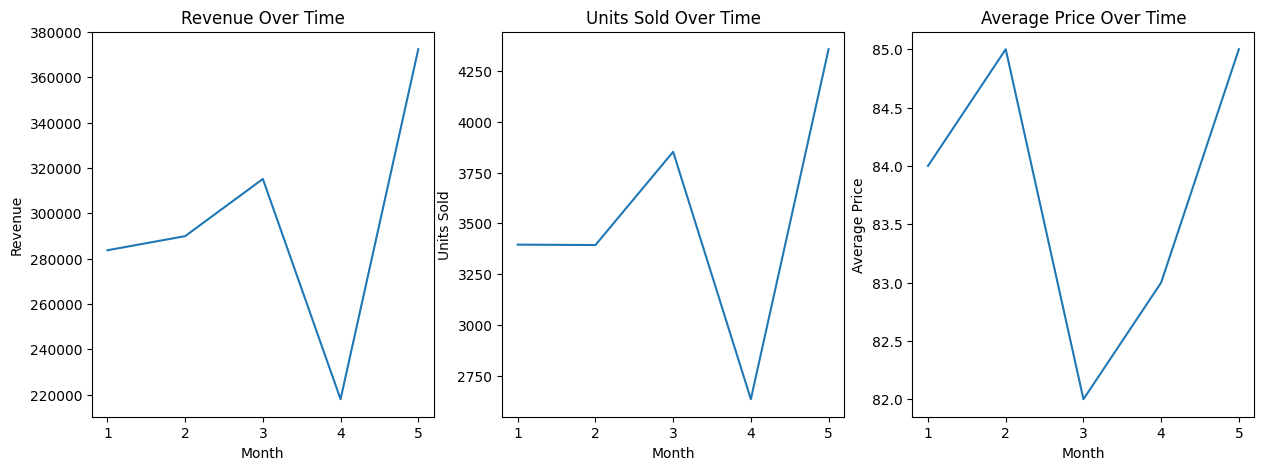

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

months=df['MONTH_ID'].unique()
months.sort()
# plot revenue over time
# create subplots
fig, axs = plt.subplots(1,3, figsize=(15, 5))

# plot revenue over time
axs[0].plot(months, revenue_per_month, )
axs[0].set_title('Revenue Over Time')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Revenue')
axs[0].set_xticks(months)
# plot units sold over time
axs[1].plot(months, total_units_sold_per_month)
axs[1].set_title('Units Sold Over Time')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Units Sold')
axs[1].set_xticks(months)
# plot average price over time
axs[2].plot(months, average_price_per_month)
axs[2].set_title('Average Price Over Time')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Average Price')
axs[2].set_xticks(months)

plt.show()

In [31]:
#Seperated plots

# import matplotlib.pyplot as plt
# import pandas as pd

# months=df['MONTH_ID'].unique()
# months.sort()
# # plot revenue over time
# fig1, ax1 = plt.subplots()
# ax1.plot(months, revenue_per_month)
# ax1.set_title('Revenue Over Time')
# ax1.set_xlabel('Month')
# ax1.set_ylabel('Revenue')
# ax1.set_xticks(months)

# # plot units sold over time
# fig2, ax2 = plt.subplots()
# ax2.plot(months, total_units_sold_per_month)
# ax2.set_title('Units Sold Over Time')
# ax2.set_xlabel('Month')
# ax2.set_ylabel('Units Sold')
# ax2.set_xticks(months)

# # plot average price over time
# fig3, ax3 = plt.subplots()
# ax3.plot(months, average_price_per_month)
# ax3.set_title('Average Price Over Time')
# ax3.set_xlabel('Month')
# ax3.set_ylabel('Average Price')
# ax3.set_xticks(months)

# plt.show()

##Findings:

In the first 2 months we can that the company made little profit thanks stable sales even though the price was increased. Also, the sharp decline of price between month 2(February) and month 3(March) resulted in a stronger positive trend towards more sales with tangible revenue generated.

However, Between month 3(March) and month 5(May) we can clearly identify a V-shape rebound for sales and revenue to higher levels than before; but we cannot say the same for prices. In fact, from month 3(March) onwards, the prices kept increasing with accelerated increase from month 4(April). This indicates that the company's strategy for extremely lowering the price to freshen up their sales is a working strategy that yields more revenue in the long run.

We suggest that the company follows the same trend but with longer periods. For example, they might apply the same strategy over periods ranging between 3 to 6 months. This way, the company will be to generate more profit and keep their gross sale movement active whil not harming the price on the initial price drop.

#Identifying Top 5 Highest selling Cities

To get the highest selling Cities, we need to calculate the total revenue per city, rank results, and the top 5 ranks (highest values) will be our top 5 selling cities

In [32]:
#Total Revenue = QUANTITYORDERED * PRICEEACH

df['OrderRevenue'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Group the data by City and calculate the total revenue for each month
revenue_per_city = df.groupby('CITY')['OrderRevenue'].sum().round().astype(int)

revenue_per_city = revenue_per_city.sort_values(ascending=False)

print(revenue_per_city)

CITY
Madrid            266457
San Rafael        173160
Nantes             84116
San Jose           77690
Reims              48729
North Sydney       47541
Oulu               47183
Salzburg           46475
Newark             46391
Boston             44166
Espoo              43870
San Francisco      42113
Chatswood          41860
Reggio Emilia      37493
New Bedford        36667
Pasadena           35762
Liverpool          32056
Minato-ku          30740
Strasbourg         28752
Boras              27884
Paris              27314
Montreal           26263
Brickhaven         25838
Bridgewater        19849
Helsinki           19728
South Brisbane     18311
Kobenhavn          17400
Toulouse           14557
Glen Waverly       13269
Charleroi          11700
Burlingame         10388
Bruxelles           8412
Graz                8339
Singapore           6578
Allentown           6167
Glendale            3500
Marseille           2317
Name: OrderRevenue, dtype: int64


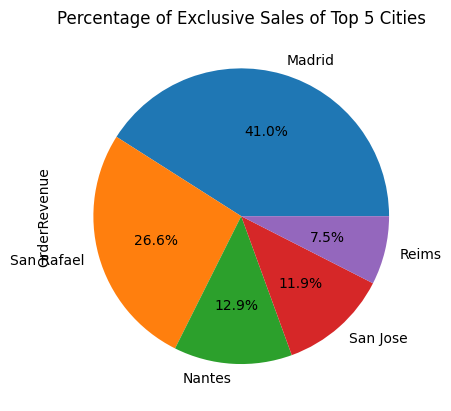

In [33]:
# capture top 5 cities
top_5_cities = revenue_per_city.head(5)

# create a pie chart with percentage labels
top_5_cities.plot.pie(autopct='%.1f%%',title='Percentage of Exclusive Sales of Top 5 Cities')

plt.show()

##Recommendations

To generate more revenue from top 5 selling cities, the company shoudl consider several strategies:

One approach is to charge more for products or services. Another approach is to increase the number of transactions by using various approaches such as offering discounts and special promotions . The company can also improve collections by using technology to automate billing and payment processes. Additionally, the company can create new revenue streams by adding complementary services or products to your current line of products.

By implementing these strategies, the company can increase revenues and business growth.